In [1]:
#Import packages

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from scipy.stats import norm
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score


In [2]:
#Import dataset
data_relevant = pd.read_csv('data_relevant.csv')
data_relevant

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,21,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,25,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,26,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,34,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,39,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,30119,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006
2733,30128,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378
2734,30138,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753
2735,30142,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531


In [3]:
data_relevant = data_relevant.drop(columns=['Unnamed: 0', 'floors'])

data_relevant.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,750000.0,3,2.0,1590,7754,440,0,1990,98038,7,4,471.698113
1,580000.0,3,3.0,2020,4482,600,120,1992,98031,7,3,287.128713
2,2000000.0,3,3.0,2700,7694,530,640,2006,98053,9,3,740.740741
3,785000.0,3,2.0,1350,7354,460,120,1985,98133,7,5,581.481481
4,1680000.0,3,2.5,5200,206039,1080,670,2007,98092,10,3,323.076923


## Scaling

In [4]:
X = data_relevant.drop('price', axis=1)
y = data_relevant['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1337)

In [5]:
#Applying Standard Scaling to get optimized result
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

# Dummy Model testing / Baseline

In [6]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,-1.688215,-2.265027,-0.868237,3.472011,-2.248937,-0.989430,-0.368928,-0.351908,-0.624511,0.672149,1.271612
1,-0.409497,0.244621,-0.110036,-0.299129,0.454265,0.309388,-0.874268,-0.651605,0.638986,0.672149,-0.974926
2,-0.409497,0.244621,-0.790870,-0.215433,-0.124992,-0.177669,-0.469996,-0.551706,-0.624511,-0.817633,-1.416242
3,0.869221,1.081170,0.524376,-0.103125,-0.221535,0.877622,-0.166792,-1.011241,0.638986,0.672149,1.680620
4,-1.688215,-0.591928,-0.558767,-0.367200,-0.028449,-0.015316,1.652430,-0.052211,0.638986,-0.817633,0.475918
...,...,...,...,...,...,...,...,...,...,...,...
1828,0.869221,1.081170,0.539850,-0.255132,0.405994,-0.015316,-0.672132,1.985727,0.638986,-0.817633,-0.472086
1829,3.426657,1.081170,1.251630,-0.208427,0.212908,-0.137081,-0.975336,-0.072191,0.638986,0.672149,1.147461
1830,-1.688215,-0.591928,0.586270,0.483841,7.550171,-0.989430,0.035343,-0.271989,1.902484,0.672149,-0.542659
1831,-0.409497,-0.591928,0.137539,-0.274752,-0.221535,-0.218257,-0.571064,-0.072191,-0.624511,-0.817633,0.586171


In [7]:
# Creates scaled features dataframe and then adds on price column

# Train
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = data_relevant.drop('price', axis=1).columns
y_train.reset_index(drop=True,inplace=True)
X_train_scaled_final = pd.concat((X_train_scaled,y_train),axis=1)
X_train.reset_index(drop=True,inplace=True)
X_train_final = pd.concat((X_train,y_train),axis=1)

# Test
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = data_relevant.drop('price', axis=1).columns
y_test.reset_index(drop=True,inplace=True)
X_test_scaled_final = pd.concat((X_test_scaled,y_test),axis=1)

In [8]:
X_train_final

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft,price
0,2,1.0,1360,180479,0,0,1984,98038,7,4,661.764706,900000.0
1,3,2.5,1850,7684,560,320,1979,98023,8,4,286.486486,530000.0
2,3,2.5,1410,11519,440,200,1983,98028,7,3,212.765957,300000.0
3,4,3.0,2260,16665,420,460,1986,98005,8,4,730.088496,1650000.0
4,2,2.0,1560,4565,460,240,2004,98053,8,3,528.846154,825000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1828,4,3.0,2270,9700,550,240,1981,98155,8,3,370.484581,841000.0
1829,6,3.0,2730,11840,510,210,1978,98052,8,4,641.025641,1750000.0
1830,2,2.0,2300,43560,2030,0,1988,98042,9,4,358.695652,825000.0
1831,3,2.0,2010,8801,420,190,1982,98052,7,3,547.263682,1100000.0


In [9]:
train = data_relevant
test = data_relevant

X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop("price", axis=1)
y_test = test["price"]

X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,3,2.0,1590,7754,440,0,1990,98038,7,4,471.698113
1,3,3.0,2020,4482,600,120,1992,98031,7,3,287.128713
2,3,3.0,2700,7694,530,640,2006,98053,9,3,740.740741
3,3,2.0,1350,7354,460,120,1985,98133,7,5,581.481481
4,3,2.5,5200,206039,1080,670,2007,98092,10,3,323.076923


In [10]:
X = data_relevant.drop('price', axis=1)
y = data_relevant['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1337)

dummy_regr = DummyRegressor()
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_train, y_train)
dummy_regr.score(X_test, y_test)
dummy_train_RMSE = MSE(y_train,dummy_regr.predict(X_train), squared = False)
dummy_test_RMSE = MSE(y_test,dummy_regr.predict(X_test), squared = False)

print(f'Baseline Model Train Score: {dummy_regr.score(X_train, y_train)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test, y_test)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')

Baseline Model Train Score: 0.0
Baseline Model Train RMSE: 383426.0

Baseline Model Test Score: -8.245490061442595e-05
Baseline Model Test RMSE: 393394.0


In [11]:
data_relevant['avg_price'] = data_relevant['price'].mean()
X = data_relevant['avg_price']
y = data_relevant['price']
dummy_model = sm.OLS(y, sm.add_constant(X))

In [12]:
X_train.shape

(1833, 11)

In [13]:
X_test.shape

(904, 11)

In [14]:
#Applying Standard Scaling to get optimized result
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

In [15]:
dummy_regr = DummyRegressor()
dummy_regr.fit(X_train_scaled, y_train)
dummy_regr.predict(X_train_scaled)
dummy_regr.predict(X_test_scaled)
dummy_regr.score(X_train_scaled, y_train)
dummy_regr.score(X_test_scaled, y_test)
dummy_train_RMSE = MSE(y_train,dummy_regr.predict(X_train_scaled), squared = False)
dummy_test_RMSE = MSE(y_test,dummy_regr.predict(X_test), squared = False)

print(f'Baseline Model Train Score: {dummy_regr.score(X_train_scaled, y_train)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test_scaled, y_test)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')

Baseline Model Train Score: 0.0
Baseline Model Train RMSE: 383426.0

Baseline Model Test Score: -8.245490061442595e-05
Baseline Model Test RMSE: 393394.0


In [18]:
X_train_scaled['sqft_living']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Simple Model

In [ ]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [ ]:
data_relevant.corr()['price'].map(abs).sort_values(ascending=False)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_train['sqft_living'], y_train, alpha=0.5)
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
ax.set_title("Most Correlated Feature vs. Price");

In [ ]:
# OLS Regression on Train Data for Simple Model
X = sm.add_constant(X_train_scaled)
y = y_train

model = sm.OLS(y,X)
results = model.fit()
results.summary()

In [ ]:
X_train.sqft_living

In [ ]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1337)

#Training the Model
lr = LinearRegression()
lr.fit(X_train,y_train)

#Applying Model to Make Prediction
y_lr_train_pred = lr.predict(X_train.)
y_lr_test_pred = lr.predict(X_test)

#Evaluate Model Performance of training set
lr_train_mse = MSE(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

#Evaluate Model Performance of testing set
lr_test_mse = MSE(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

print(f'Simple Model Train score: {lr_train_r2}')
print(f'Simple Model Train RMSE: {round(lr_train_mse)}')
print()
print("Simple Model Test score: ", lr_test_r2)
print(f'Simple Model Test RMSE: {round(lr_test_mse)}')

In [19]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
971,2,1.0,1360,180479,0,0,1984,98038,7,4,661.764706
1309,3,2.5,1850,7684,560,320,1979,98023,8,4,286.486486
420,3,2.5,1410,11519,440,200,1983,98028,7,3,212.765957
1296,4,3.0,2260,16665,420,460,1986,98005,8,4,730.088496
896,2,2.0,1560,4565,460,240,2004,98053,8,3,528.846154
...,...,...,...,...,...,...,...,...,...,...,...
2727,4,3.0,2270,9700,550,240,1981,98155,8,3,370.484581
1497,6,3.0,2730,11840,510,210,1978,98052,8,4,641.025641
1256,2,2.0,2300,43560,2030,0,1988,98042,9,4,358.695652
860,3,2.0,2010,8801,420,190,1982,98052,7,3,547.263682


In [20]:
X_train_simple_model = X_train[['sqft_living']]
X_test_simple_model = X_test[['sqft_living']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=420)

simple_model = LinearRegression()
simple_model.fit(X_train_simple_model,y_train)

simple_model_scores = cross_validate(
    estimator=simple_model,
    X=data_relevant[['sqft_living']],
    y=data_relevant.price,
    return_train_score=True,
    cv=splitter
)

simple_predict_train = simple_model.predict(X_train_simple_model)
simple_predict_test = simple_model.predict(X_test_simple_model)

simple_train_RMSE = MSE(y_train,simple_predict_train,squared = False)
simple_test_RMSE = MSE(y_test,simple_predict_test, squared = False)

simple_condition_num = sm.OLS(y_train, sm.add_constant(X_train_simple_model)).fit().condition_number

print(f'Simple Model Train score: {simple_model_scores["train_score"].mean()}')
print(f'Simple Model Train RMSE: {round(simple_train_RMSE)}')
print(f'Simple Model Train Condition Number: {simple_condition_num}')
print()
print("Simple Model Test score: ", simple_model_scores["test_score"].mean())
print(f'Simple Model Test RMSE: {round(simple_test_RMSE)}')

Simple Model Train score: 0.29759180527859147
Simple Model Train RMSE: 320728.0
Simple Model Train Condition Number: 6357.027070195866

Simple Model Test score:  0.2911758822623338
Simple Model Test RMSE: 331435.0


In [21]:
# OLS Regression on Train Data for Simple Model
X = sm.add_constant(X_train['sqft_living'])
y = y_train

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     785.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          3.52e-144
Time:                        15:46:43   Log-Likelihood:                -25840.
No. Observations:                1833   AIC:                         5.168e+04
Df Residuals:                    1831   BIC:                         5.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.164e+05   2.35e+04      9.207      0.000     1.7e+05    2.63e+05
sqft_living   325.1242     11.598     28.033      0.000     302.378     347.871
==============================================================================
Omnibus:                      204.321   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.657
Skew:                           0.797   Prob(JB):                     2.86e-69
Kurtosis:                       4.263   Cond. No.                     6.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# OLS Regression on Test Data for Simple Model
X = sm.add_constant(X_test['sqft_living'])
y = y_test

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     370.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.73e-69
Time:                        15:46:43   Log-Likelihood:                -12773.
No. Observations:                 904   AIC:                         2.555e+04
Df Residuals:                     902   BIC:                         2.556e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.896e+05   3.58e+04      5.302      0.000    1.19e+05     2.6e+05
sqft_living   343.2774     17.826     19.257      0.000     308.291     378.263
==============================================================================
Omnibus:                       78.918   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.814
Skew:                           0.653   Prob(JB):                     4.31e-26
Kurtosis:                       4.181   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

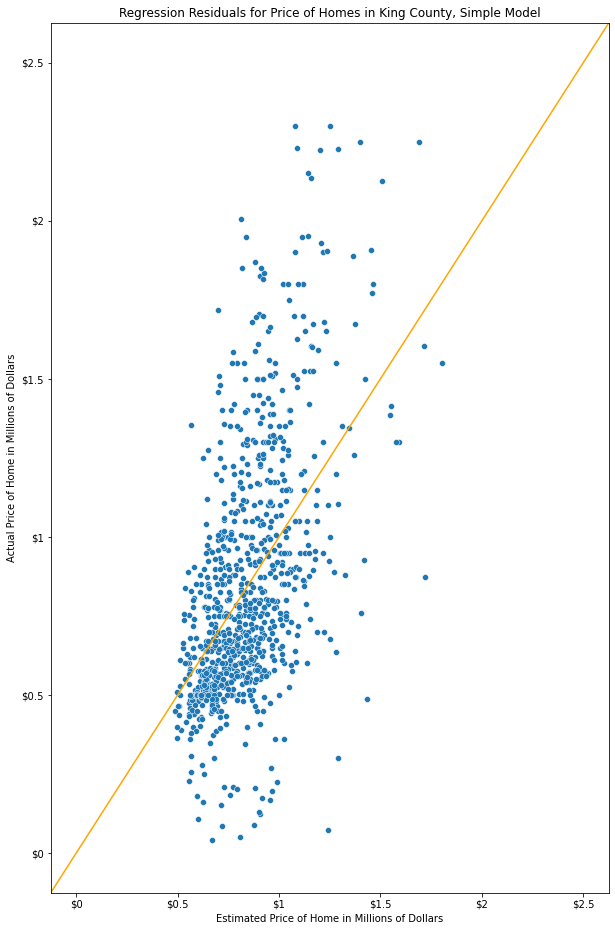

In [23]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,16))

sns.scatterplot(x = simple_predict_test, y = y_test, ax=ax)
ax.set_title('Regression Residuals for Price of Homes in King County, Simple Model')
ax.set_xlabel('Estimated Price of Home in Millions of Dollars')
ax.set_ylabel('Actual Price of Home in Millions of Dollars')
ax.ticklabel_format(style='plain') 
millions = ticker.FuncFormatter(lambda x, pos: '${0:g}'.format(x/1000000))
ax.yaxis.set_major_formatter(millions)
ax.xaxis.set_major_formatter(millions)
x,y = [range(0,2500000,500000)],[range(0,2500000,500000)]
plt.axline((0,0),(2500000,2500000), color = 'orange')
plt.show();

In [24]:
abs(data_relevant.corr()) > 0.5

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft,avg_price
price,True,False,False,True,False,False,False,False,False,True,False,True,False
bedrooms,False,True,True,True,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,True,False,False,False,False,False,False,False,False,False
sqft_living,True,True,True,True,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_garage,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_patio,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False
postal_code,False,False,False,False,False,False,False,False,True,False,False,False,False
grade_code,True,False,False,True,False,False,False,False,False,True,False,False,False


In [25]:
X_train_second_model = X_train[['sqft_living','price_sqft']]
X_test_second_model = X_test[['sqft_living','price_sqft']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=420)

second_model = LinearRegression()
second_model.fit(X_train_second_model,y_train)

second_model_scores = cross_validate(
    estimator=simple_model,
    X=data_relevant[['sqft_living','price_sqft']],
    y=data_relevant.price,
    return_train_score=True,
    cv=splitter
)

second_predict_train = second_model.predict(X_train_third_model)
second_predict_test = second_model.predict(X_test_third_model)

second_train_RMSE = MSE(y_train,second_predict_train,squared = False)
second_test_RMSE = MSE(y_test,second_predict_test, squared = False)

second_condition_num = sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit().condition_number

print(f'Second Model Train score: {second_model_scores["train_score"].mean()}')
print(f'Second Model Train RMSE: {round(second_train_RMSE)}')

print()
print("Second Model Test score: ", second_model_scores["test_score"].mean())
print(f'Second Model Test RMSE: {round(second_test_RMSE)}')

NameError: name 'X_train_third_model' is not defined

In [ ]:
# OLS Regression on Test Data for Simple Model
X = sm.add_constant(X_test[['sqft_living','price_sqft']])
y = y_test

model = sm.OLS(y,X)
results = model.fit()
results.summary()

In [ ]:
# OLS Regression on Train Data for Simple Model
X = sm.add_constant(X_train[['sqft_living','price_sqft']])
y = y_train

model = sm.OLS(y,X)
results = model.fit()
results.summary()

## Identifying Multicollinearity (Multicollinearity of Features - Lab)

In [ ]:
df = data_relevant.copy()
df

In [ ]:
#Removing the target variable
data_pred = df.drop('price', axis=1)

In [ ]:
data_pred.corr()

In [ ]:
#0.5 is used as the cut off for high-correlation
abs(data_pred.corr()) > 0.5

In [ ]:
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df

In [ ]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [ ]:
df[(df.cc>.5) & (df.cc <1)]

In [ ]:
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

It appears the variables `'bathrooms'`, `'sqft_living'`, `'grade_code'`, and `'bedrooms'` are highly correalted. Remvoal of three of the four features would be best to remove collinear features.

# Appendix

## Sanity Checks